# <p style="text-align:center">Drug prediction Using Decision Tree

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
data = pd.read_csv(url)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### About the dataset
The data has the details of a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

To find out which drug might be appropriate for a future patient with the same illness, a model will be built. The training part of the dataset is used to build a decision tree, and then used to predict the class of an unknown patient or to prescribe a drug to a new patient.

## Data Analysis and pre-processing
Some basic information about the dataset. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling.

In [9]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex']) 
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol']) 
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


There are 5 parameters that can be used for modeling and 1 feature as the target variable. From comparison of the data before Label encoding and after it, the following changes can be observed:

For parameter 'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
For parameter 'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
For parameter 'Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$


Checking if there is any missing values in the dataset.

In [12]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

There are no missing values.

To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value. 

In [15]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
data['Drug_num'] = data['Drug'].map(custom_map)
data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


Finding the correlation of the input variables with the target variable and identifying the features most significantly affecting the target.

In [17]:
data.drop('Drug',axis=1).corr()['Drug_num']

# This shows that the drug recommendation is mostly correlated with the Na_to_K and BP features.

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

Plotting the count of the records with each drug recommendation

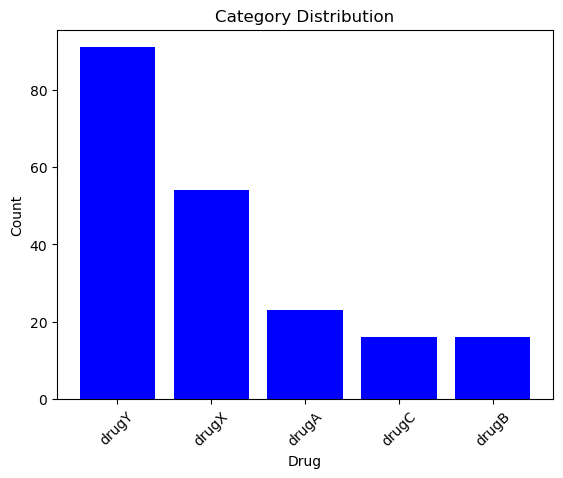

In [29]:
category_counts = data['Drug'].value_counts()

plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

This shows the distribution of the different classes, clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.

## Modeling

For modeling this dataset with a Decision tree classifier, the dataset is splitted into training and testing subsets. For this, the target variable is separated from the input variables.


In [36]:
y = data['Drug']
X = data.drop(['Drug','Drug_num'], axis=1)

The training data is separated from the testing data. 30% of the data is used for testing and the rest for training the Decision tree.

In [39]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [41]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [43]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluation

In [46]:
# generating the predictions on the test set
tree_predictions = drugTree.predict(X_testset)

In [48]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


This means that the model was able to correctly identify the labels of 98.33%, i.e. 59 out of 60 test samples. 


### Visualizing the tree

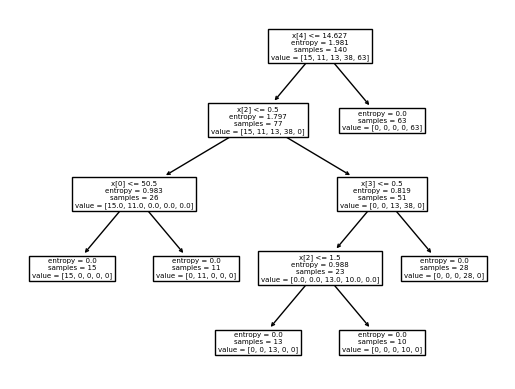

In [52]:
plot_tree(drugTree)
plt.show()

From this tree, the criteria developed by the model to identify the class of each training sample can be derived, interpreting them by tracing the criteria defined by tracing down from the root to the tree's leaf nodes.

For instance, the decision criterion for:
Drug Y is ${Na\_to\_K} \gt 14.627$.
Drug A : $Na\_to\_K <= 14.627, BP = High, Age <= 50.5$<br>
Drug B : $Na\_to\_K <= 14.627, BP = High, Age > 50.5$ <br>
Drug C : $Na\_to\_K <= 14.627, BP = Normal, Cholesterol = High$<br>
Drug X : $Na\_to\_K <= 14.627, (BP = Low, Cholesterol = High) or (BP = Normal/Low, Cholesterol = Normal)$

Checking how the performance of the model be affected If the max depth of the tree is reduced to 3

In [57]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset,y_trainset)
tree_predictions = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.8166666666666667


The accuracy has reduced compared to the model with max depth of 4. This model was able to correctly identify the labels of 81.67%, i.e. 59 out of 60 test samples.